In [1]:
import time
start_time=time.time()

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time

In [4]:
rg="604"
reg='\\604r'

In [5]:
T=8350#K Table 5

https://iopscience.iop.org/article/10.1088/0004-637X/700/1/654

In [6]:
RA=23.638292#J2000
Dec=30.784889#J200

https://ned.ipac.caltech.edu/byname?objname=ngc%20604&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [7]:
inputfile=dict()
inputfile[0]='Obs\ISIS.604.Red.txt'

Arm Data

In [8]:
#Ha,[NII],[SII]

LineN=['H$_{α}$ 6563','[NII]λ6548','[NII]λ6584','[SII]λ6717','[SII]λ6731']
LineM=['Ha6563','NII6548','NII6584','SII6717','SII6731']
LineD=['H','Nx','N','Sx','S']
line=['Ha','Nb','Na','Sb','Sa']
l=[6562.8,6548,6584,6717,6731]#AngstromsR
SI=[18,12,12,15,15]#km/s
XW=[1.00794,14.0067,14.0067,32.065,32.065]
color=['green','orange','orange','red','red']

#Hb,[OIII]

#LineN=['H$_{β}$ 4861','[OIII]λ4959','[OIII]λ5007']
#LineM=['Hb4861','OIII4959','OIII5007']
#line=['Hb','Ob','O4']
#l=[4861.36,4958.9,5006.9]#AngstromsB
#SI=[18,19,19]#km/s
#XW=[1.00794,15.9994,15.9994]
#color=['purple','blue','blue']

n=len(l)

In [9]:
Data=pd.read_table(inputfile[0])
Data=Data.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0",})


In [10]:
Data

,Pos,Slit,X,Y,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1,1,199.81,19.6,604R1_778-001004.xlsx,6560.006,0.419,3.152,0.760,-19.79,...,6.9110,9.8280,6724.307,1.618,2.765,2.312,-3.363,3.125,-9.896,-12.140
1,2,1,198.47,19.6,604R1_778-005008.xlsx,6559.806,0.427,3.849,1.260,-18.81,...,1.5190,0.0000,6726.936,0.812,2.295,1.196,4.827,3.316,11.790,8.589
2,3,1,197.13,19.6,604R1_778-009012.xlsx,6565.844,6.249,28.117,18.167,-16.44,...,-7.2300,-6.1340,6723.383,0.606,1.294,0.730,2.938,4.510,4.045,7.195
3,4,1,195.79,19.6,604R1_778-013016.xlsx,6563.614,1.206,22.266,4.208,-14.54,...,-0.1011,-0.5723,6725.799,0.636,1.021,0.724,-8.003,6.818,-8.701,-7.102
4,5,1,194.45,19.6,604R1_778-017020.xlsx,6560.380,0.479,3.310,0.990,-16.68,...,-20.7700,-12.5400,6728.612,0.685,3.266,1.290,-4.778,3.152,-16.610,-9.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,146,10,5.36,0.0,604R10_796-581584.xlsx,6562.497,1.075,25.496,4.464,-16.81,...,12.7500,4.8210,6726.949,0.155,0.835,0.259,-6.647,4.902,-5.906,-4.347
1496,147,10,4.02,0.0,604R10_796-585588.xlsx,6559.596,0.502,2.088,1.022,-14.64,...,-32.3900,-237.2000,6732.367,0.000,0.196,0.000,8.149,0.000,1.704,4.226
1497,148,10,2.68,0.0,604R10_796-589592.xlsx,6555.097,0.403,1.710,0.586,-13.80,...,-34.2900,-13.9000,6730.058,1.412,7.141,3.258,3.012,1.870,22.900,19.520
1498,149,10,1.34,0.0,604R10_796-593596.xlsx,6559.274,0.471,2.991,0.726,-17.67,...,8.3980,12.5800,6728.062,1.317,3.541,2.472,3.947,3.851,14.880,11.680


In [11]:
Data.columns

Index(['Pos', 'Slit', 'X', 'Y', 'Archivo', 'Center.0', 'ErrC.0', 'Width.0',
       'ErrW.0', 'Peak.0', 'ErrP.0', 'Line', 'ErrL', 'Center.1', 'ErrC.1',
       'Width.1', 'ErrW.1', 'Peak.1', 'ErrP.1', 'Line.1', 'ErrL.1', 'Center.2',
       'ErrC.2', 'Width.2', 'ErrW.2', 'Peak.2', 'ErrP.2', 'Line.2', 'ErrL.2',
       'Center.3', 'ErrC.3', 'Width.3', 'ErrW.3', 'Peak.3', 'ErrP.3', 'Line.3',
       'ErrL.3', 'Center.4', 'ErrC.4', 'Width.4', 'ErrW.4', 'Peak.4', 'ErrP.4',
       'Line.4', 'ErrL.4'],
      dtype='object')

In [12]:
sz=3
wd=Data.X.max()-Data.X.min()
hd=Data.Y.max()-Data.Y.min()
ar=wd/hd

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


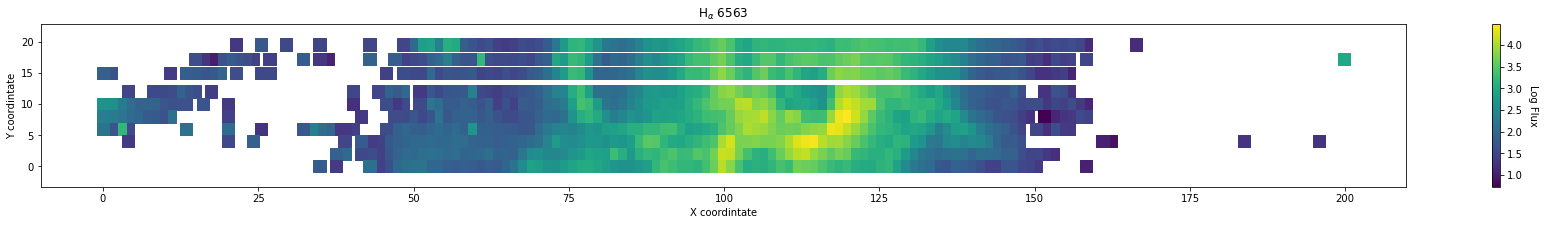

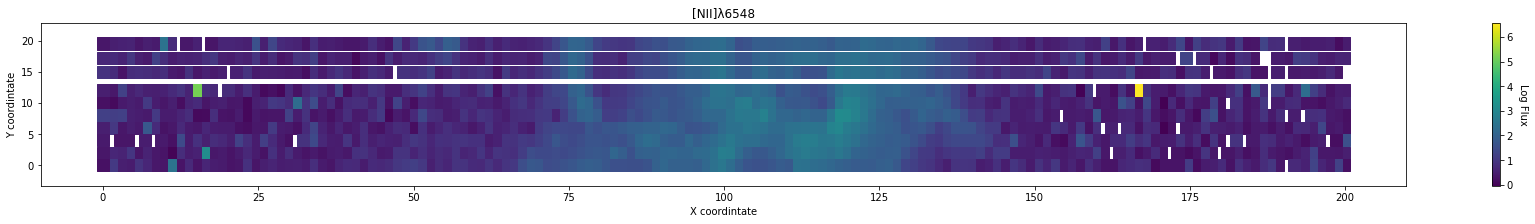

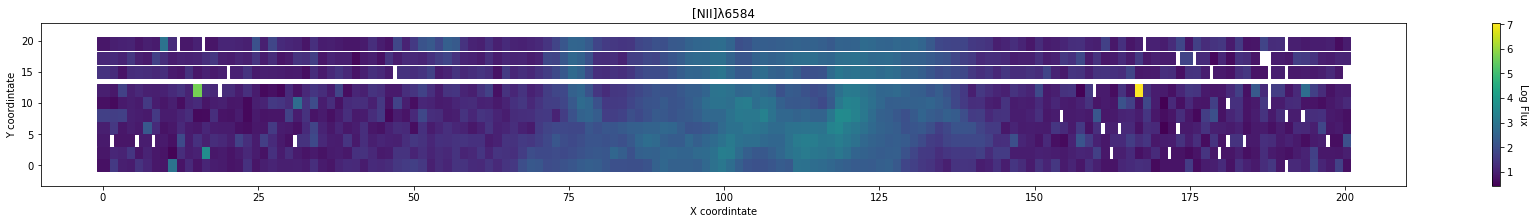

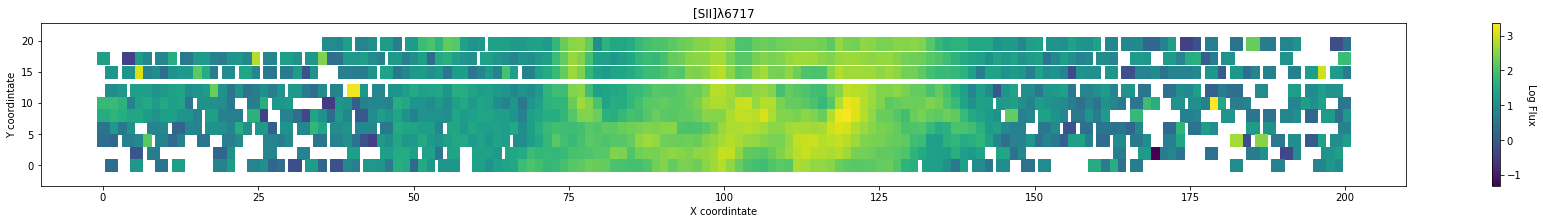

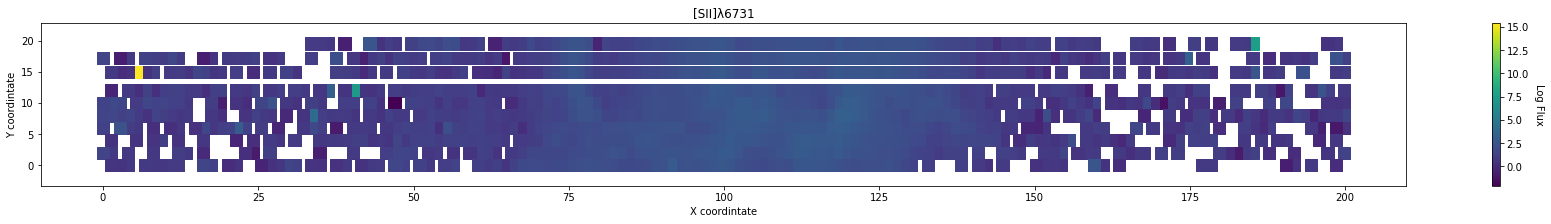

In [13]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    #fig, ax = plt.subplots(figsize=(15, 5))
    plt.scatter(Data.X,Data.Y,c=np.log10(Data['Peak.'+str(i)]), s=150,marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)  
    
    plt.savefig(rg+reg+'\Imgs\ISIS\ '+LineM[i]+'.png')

Mask 01: X corrdinate filter

Type A sample: SABRE

In [14]:
m01=(Data.X>65)&(Data.X<145)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

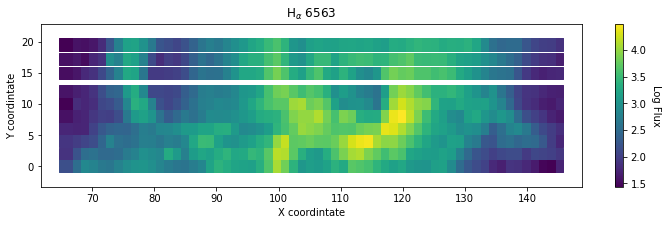

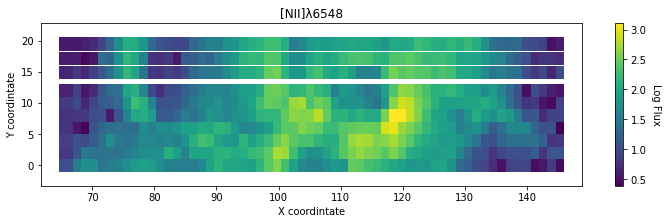

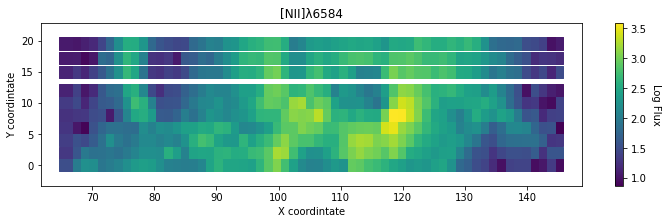

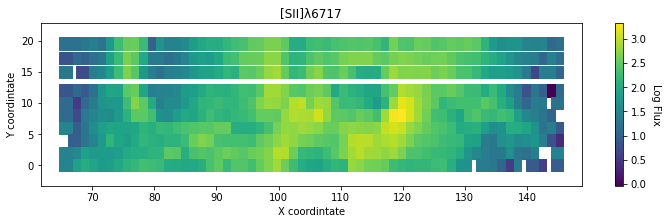

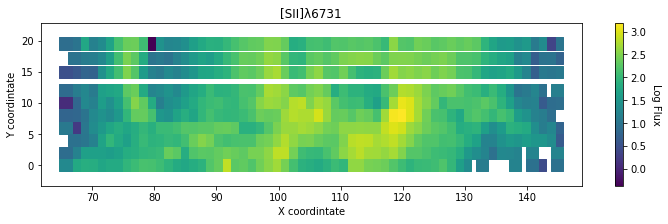

In [15]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(Data01.X,Data01.Y,c=np.log10(Data01['Peak.'+str(i)]), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)

    plt.savefig(rg+reg+'\Imgs\A\F'+LineM[i]+'.png')

Tables individual lines

In [16]:
argo=dict()

for i in range(n):
    data=[Data01['X'],Data01['Y'],Data01['Center.'+str(i)],Data01['Peak.'+str(i)],Data01['Width.'+str(i)]]
    headers=["X","Y","Center","Peak","Width"]

    argo[i]=pd.concat(data,axis=1,keys=headers)
    

RadialVelocity

$$\dfrac{\lambda_{obs}-\lambda}{\lambda}*c + CorrHel $$

In [17]:
orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 

<Quantity 25.94942746 km / s>

In [18]:
corrhelio=np.array(heliocorr.to(u.km/u.s))

#Constant
c=299792.459#km/s

for i in range(n):
    RVo=c*(argo[i].Center-l[i])/l[i]
    RV=RVo+corrhelio

    argo[i]=argo[i].assign(RV=RV.values)

Sigma Disp

$$\sigma_{disp}^{2}=\sigma_{obs}^{2}-\sigma_{therm}^{2}-\sigma_{inst}^{2}$$

$$ \sigma_{obs} = \frac{0.6006}{1.414}* \frac{Width}{\lambda}*c , \sigma_{therm}^{2} = \frac{166.3}{1.414} \frac{T_{e} \times 10^{-4}}{Xw}$$

In [19]:
#Atomic Weights
Hw=1.00794#
Nw=14.0067#
Sw=32.065#
Ow=15.9994#

#SigmaInst
SigmaInstH=18#km/s
SigmaInstN=12#km/s
SigmaInstS=15#km/s
SigmaInstO=19#km/s

#Constant
c=299792.459#km/s

In [20]:
SigmaObs=dict()

for i in range(n):
    #SigmaObs
    a=0.6006/1.414
    SigmaObs[i]=a*(argo[i].Width/l[i])*c
    
    #SigmaTerm
    b=166.6/1.414
    SigmaTerm=np.sqrt(b*(T/10000)/XW[i])

    SigmaDisp=np.sqrt(SigmaObs[i]**2-SigmaTerm**2-SI[i]**2)

    argo[i]=argo[i].assign(Sig=SigmaDisp.values)

    print(SigmaTerm)

9.87958475499144
2.6502577801116805
2.6502577801116805
1.7516220734835275
1.7516220734835275


C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:

mvr=(argo[0].RV>-275)&(argo[0].RV<-225)

for i in range(n): 
    argo[i]=argo[i][mvr]


In [22]:
for i in range(n):
    print(argo[i].describe())    

                X           Y       Center          Peak       Width  \
count  586.000000  586.000000   586.000000    586.000000  586.000000   
mean   105.305683    9.366724  6556.756782   2312.882730    1.038089   
std     23.132475    6.204385     0.207321   3786.317481    0.486135   
min     65.710000    0.000000  6556.241000     27.150000   -0.966000   
25%     85.820000    4.000000  6556.594000    271.925000    0.934250   
50%    104.600000    8.000000  6556.766000   1042.000000    1.033500   
75%    124.710000   15.000000  6556.890000   2417.500000    1.176750   
max    144.830000   19.600000  6557.301000  30960.000000    3.215000   

               RV         Sig  
count  586.000000  259.000000  
mean  -250.108248   13.514722  
std      9.470552    9.760801  
min   -273.669445    0.775992  
25%   -257.544203    6.814368  
50%   -249.687145   10.895444  
75%   -244.022754   16.881876  
max   -225.248039   58.904270  
                X           Y       Center         Peak       W

In [23]:
#argo[0]=argo[0].interpolate(method='linear',limit_direction ='both')

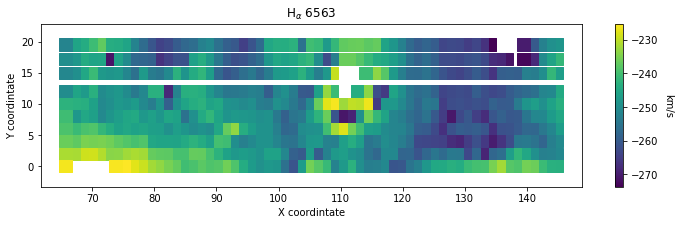

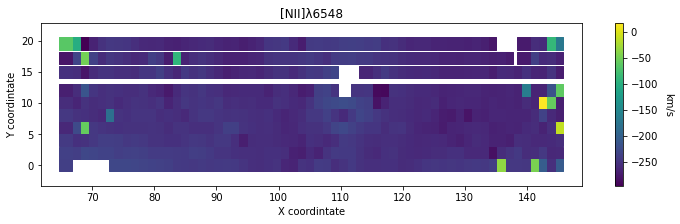

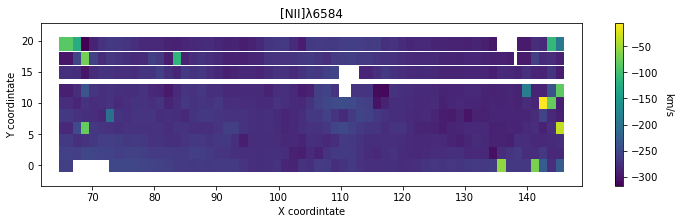

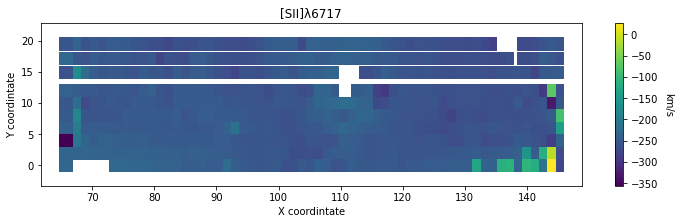

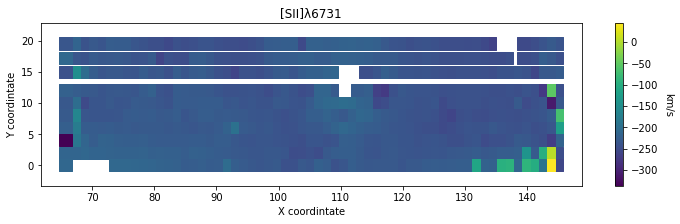

In [24]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i].X,argo[i].Y,c=argo[i].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\RV'+LineM[i]+'.png')

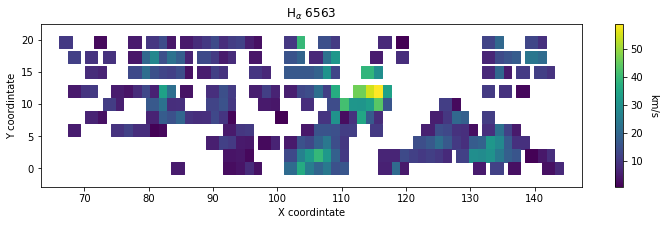

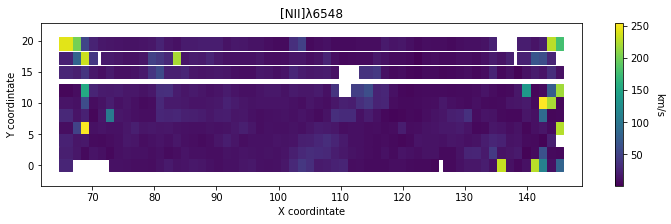

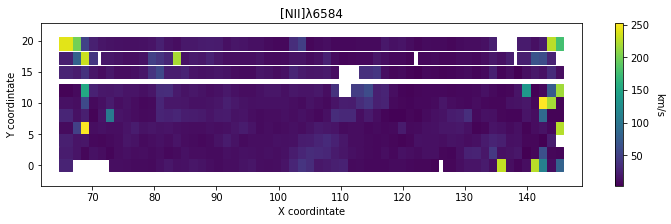

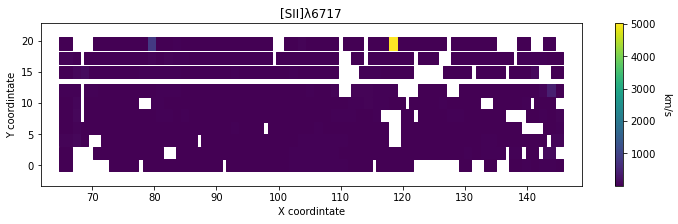

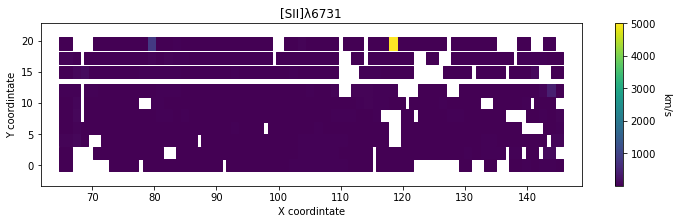

In [25]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i].X,argo[i].Y,c=argo[i].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    #cbar.ax.set_yticklabels(['0','1','2','>3'])
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\A\Sig'+LineM[i]+'.png')

Interpolate

In [26]:
#datavr=argo[0].pivot(index='Y', columns='X', values='RV')
#fig, ax = plt.subplots(figsize=(17, 4))
#sns.heatmap(datavr, cmap="viridis",xticklabels='auto',cbar_kws={'label': 'Flux'})
#plt.gca().invert_yaxis()

In [27]:
#datavr=datavr.interpolate(method='linear',limit_direction ='both')

In [28]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#sns.heatmap(datavr, cmap="viridis",xticklabels='auto',cbar_kws={'label': 'Flux'})
#plt.gca().invert_yaxis()

In [29]:
#fig, ax = plt.subplots(figsize=(sz*ar,sz))

#plt.scatter(argo[0].X,argo[0].Y,c=argo[0].Sig, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
#plt.axis('equal')
#plt.title(LineN[i])
#ax.set_xlabel('X coordintate')
#ax.set_ylabel('Y coordintate')
    
#cbar = plt.colorbar()
#cbar.set_label('km/s', rotation=270, labelpad=15)


Mask 02: X corrdinate filter

Type B sample: SABRE

In [30]:
argom01=dict()

for i in range(n):
    m02=(argo[i].X>90)&(argo[i].X<130)
    argom01[i]=argo[i][m02]

sz=3
wd=argom01[0].X.max()-argom01[0].X.min()
hd=argom01[0].Y.max()-argom01[0].Y.min()
ar=wd/hd

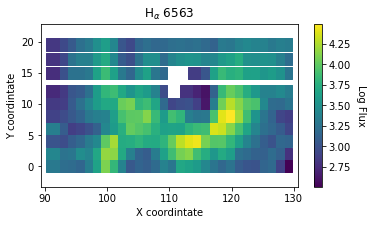

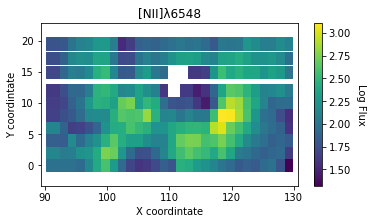

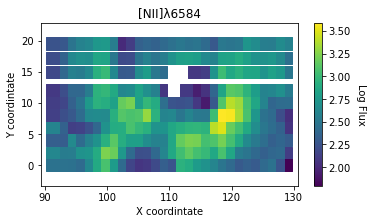

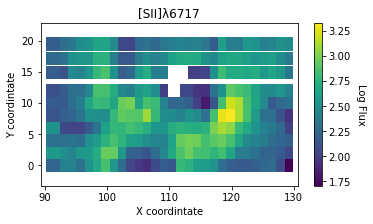

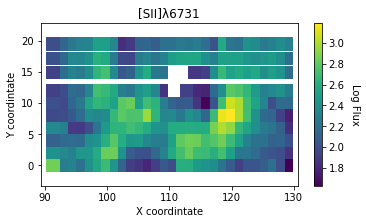

In [31]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=np.log10(argom01[i].Peak), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\F'+LineM[i]+'.png')

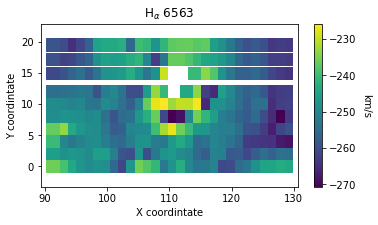

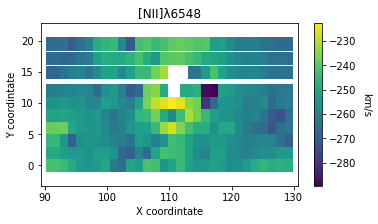

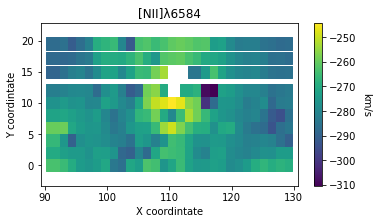

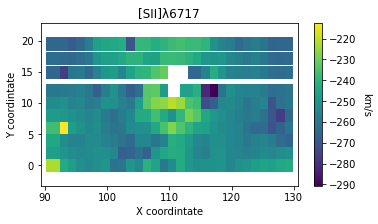

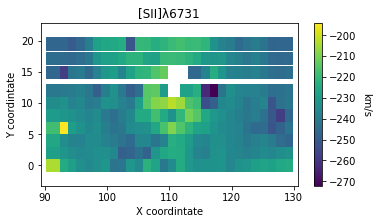

In [32]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argom01[i].X,argom01[i].Y,c=argom01[i].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\B\RV'+LineM[i]+'.png')

In [33]:
for i in range(n):
    print(argom01[i].describe())    

                X           Y       Center          Peak       Width  \
count  285.000000  285.000000   285.000000    285.000000  285.000000   
mean   109.943649    9.312632  6556.736575   4226.021754    1.121786   
std     11.335949    6.285853     0.194014   4693.707000    0.462009   
min     91.190000    0.000000  6556.306000    321.200000   -0.921000   
25%    100.580000    4.000000  6556.590000   1486.000000    0.947000   
50%    109.960000    8.000000  6556.727000   2424.000000    1.058000   
75%    119.350000   15.000000  6556.840000   5049.000000    1.212000   
max    128.740000   19.600000  6557.288000  30960.000000    3.215000   

               RV         Sig  
count  285.000000  142.000000  
mean  -251.031276   14.935756  
std      8.862651   11.260808  
min   -270.700208    0.775992  
25%   -257.726926    7.378551  
50%   -251.468687   11.503246  
75%   -246.306783   18.451527  
max   -225.841886   58.904270  
                X           Y       Center         Peak       W

Mask 03: Statistical Filters

Type C sample: SABRE

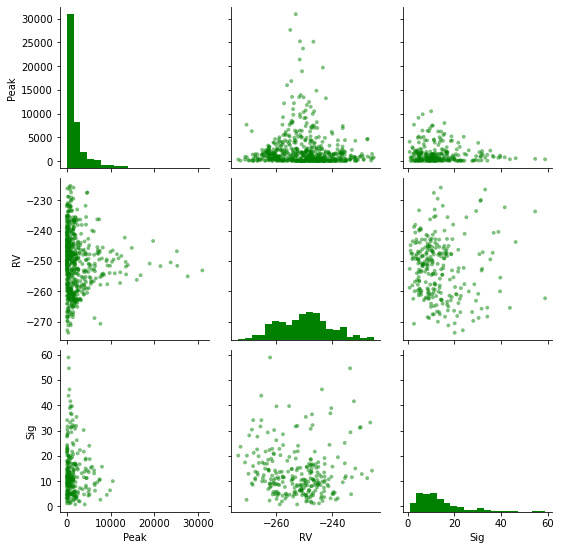

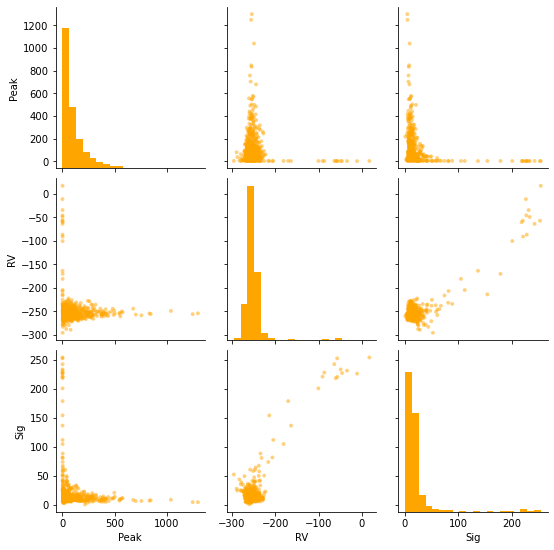

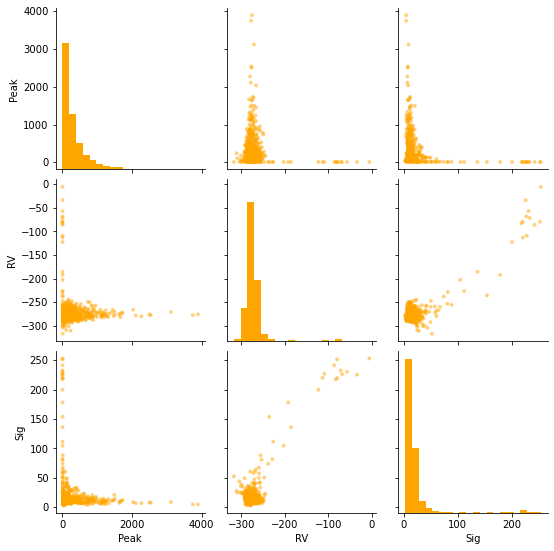

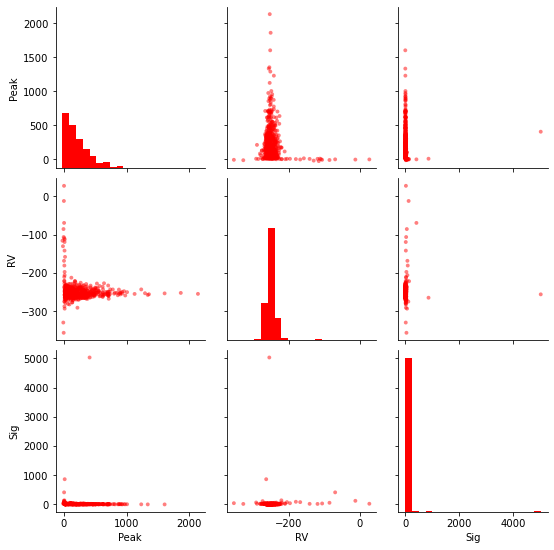

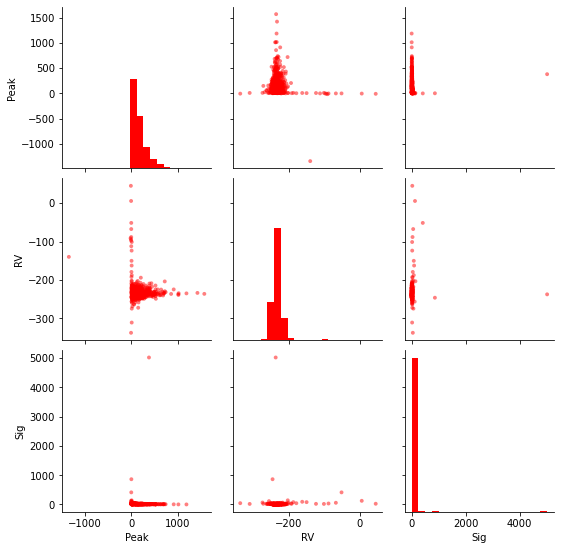

In [34]:
for i in range(n):

    sns.pairplot(argo[i],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )



In [35]:
argo[0].Peak.describe()

count      586.000000
mean      2312.882730
std       3786.317481
min         27.150000
25%        271.925000
50%       1042.000000
75%       2417.500000
max      30960.000000
Name: Peak, dtype: float64

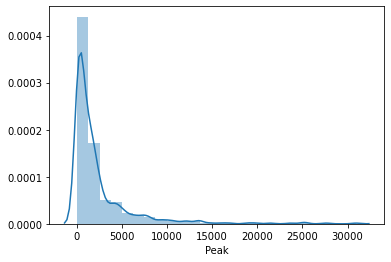

In [36]:
sns.distplot(argo[0].Peak,bins=25)

In [37]:
argo[0].Peak.describe()

count      586.000000
mean      2312.882730
std       3786.317481
min         27.150000
25%        271.925000
50%       1042.000000
75%       2417.500000
max      30960.000000
Name: Peak, dtype: float64

In [38]:
from statistics import mode
mode(argo[0].Peak)

1424.0

In [39]:
m03=(argo[0].Peak>1500)&(argo[4].Sig<1000)&(argo[1].RV>-275)&(argo[1].RV<-220)&(argo[4].RV<-210)

#m03=argo[0].Peak< argo[0].Peak.mean()+4*argo[0].Peak.std()
#m03=argo[0].Peak< mode(argo[0].Peak)+4*argo[0].Peak.std()
#m03=argo[0].RV< argo[0].RV.mean()+4*argo[0].RV.std()

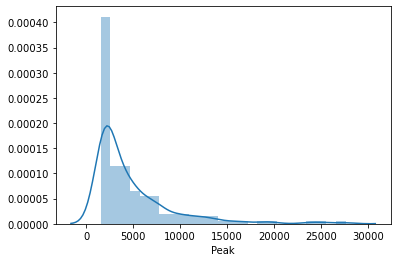

In [40]:
sns.distplot(argo[0][m03].Peak,bins=25)

In [41]:

sz=3
wd=argo[0][m03].X.max()-argo[0][m03].X.min()
hd=argo[0][m03].Y.max()-argo[0][m03].Y.min()
ar=wd/hd

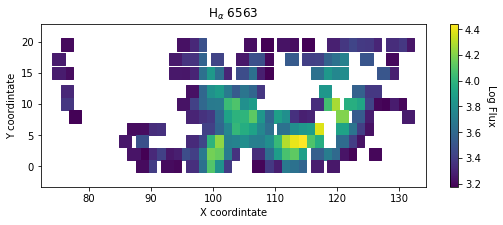

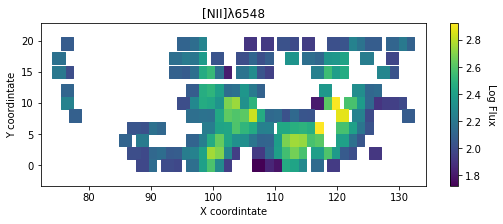

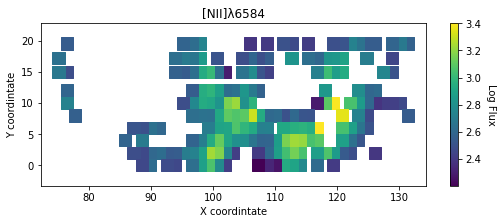

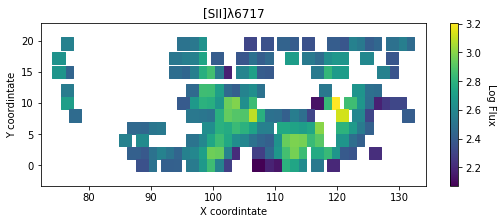

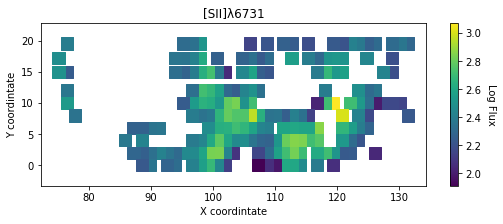

In [42]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m03].X,argo[i][m03].Y,c=np.log10(argo[i][m03].Peak), s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('Log Flux', rotation=270, labelpad=15)
    #plt.clim(1,5)  
    plt.savefig(rg+reg+'\Imgs\C\F'+LineM[i]+'.png')

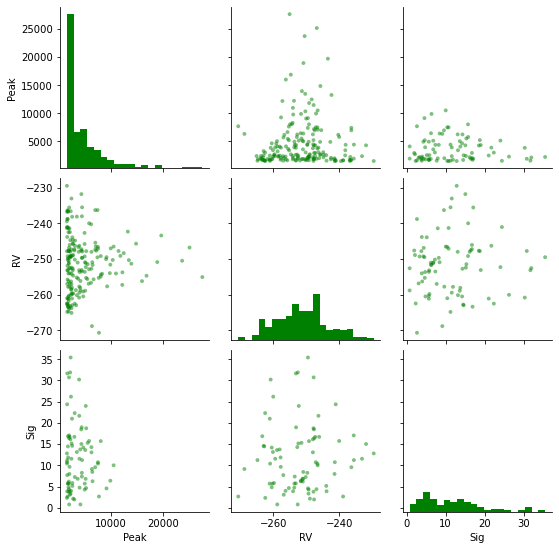

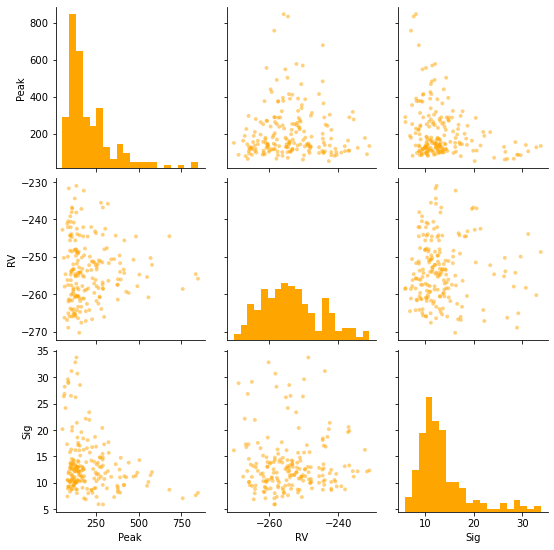

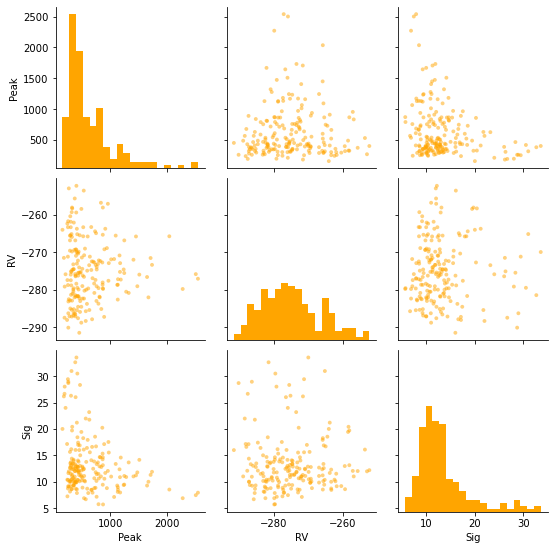

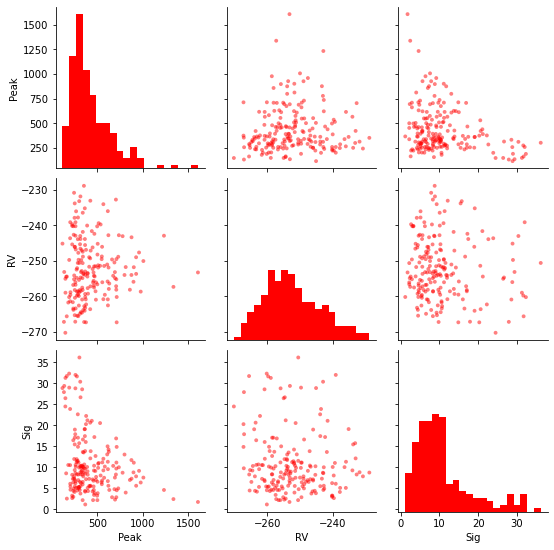

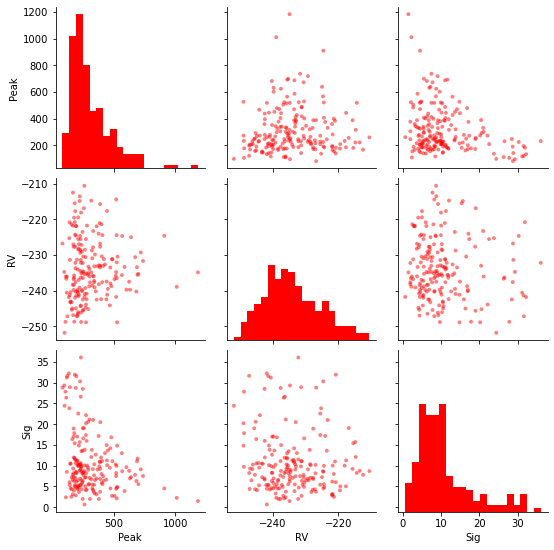

In [43]:
for i in range(n):

    sns.pairplot(argo[i][m03],
                 vars=["Peak", "RV", "Sig"],
                 diag_kind='hist',
                 plot_kws=dict(alpha=0.5, s=15, edgecolor='none',color=color[i]),
                 diag_kws=dict(bins=20,color=color[i]),
                )
    
    plt.savefig(rg+reg+'\Imgs\Corrl\ '+LineM[i]+'.png')
   

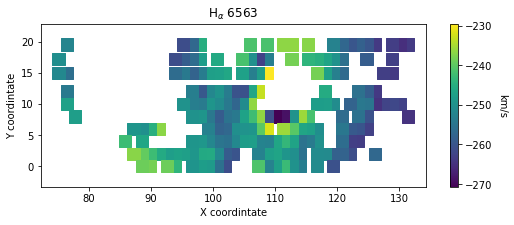

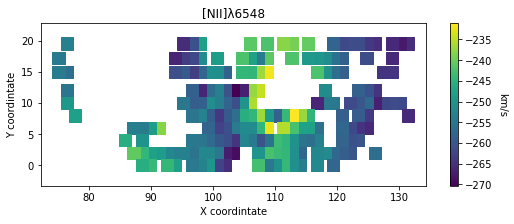

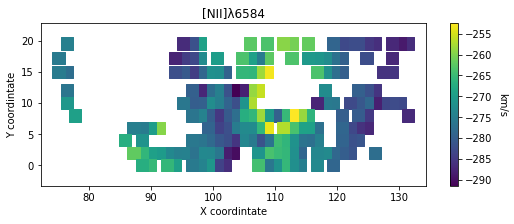

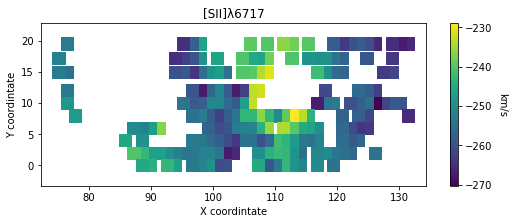

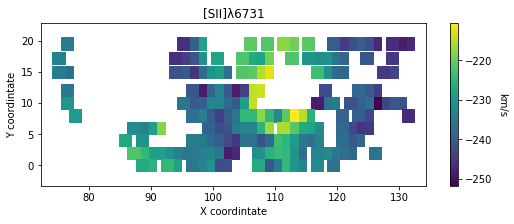

In [44]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m03].X,argo[i][m03].Y,c=argo[i][m03].RV, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\RV'+LineM[i]+'.png')

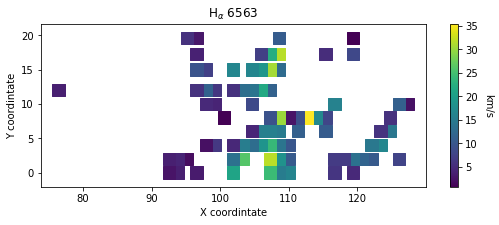

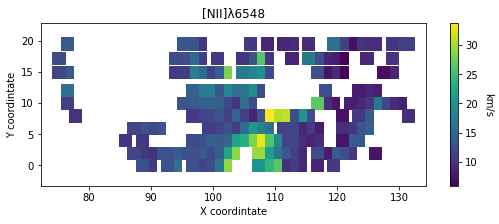

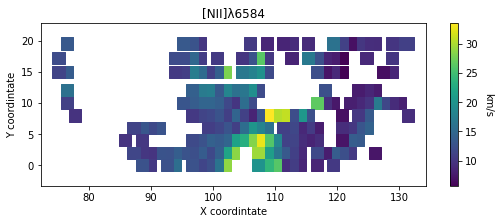

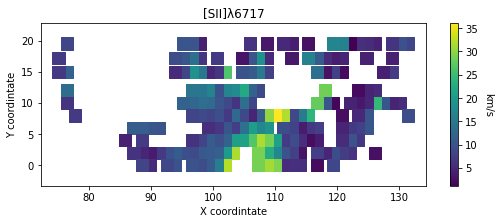

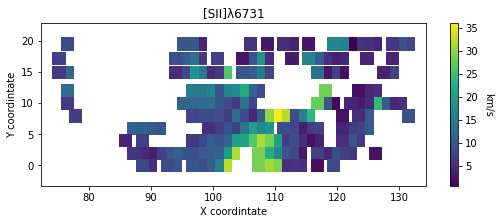

In [45]:
for i in range(n):
    fig, ax = plt.subplots(figsize=(sz*ar,sz))
    plt.scatter(argo[i][m03].X,argo[i][m03].Y,c=argo[i][m03].Sig, s=150, marker='s')
    #plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
    plt.axis('equal')
    plt.title(LineN[i])
    ax.set_xlabel('X coordintate')
    ax.set_ylabel('Y coordintate')
    
    cbar = plt.colorbar()
    cbar.set_label('km/s', rotation=270, labelpad=15)
    
    plt.savefig(rg+reg+'\Imgs\C\S'+LineM[i]+'.png')

In [46]:
for i in range(n):
    print(argo[i][m03].describe())    

                X           Y       Center          Peak       Width  \
count  193.000000  193.000000   193.000000    193.000000  193.000000   
mean   107.426425    9.001036  6556.731192   4783.989637    1.063145   
std     12.670118    6.220137     0.171192   4411.965730    0.328932   
min     75.100000    0.000000  6556.306000   1501.000000   -0.921000   
25%     99.230000    4.000000  6556.607000   1946.000000    0.954000   
50%    107.280000    8.000000  6556.736000   3013.000000    1.025000   
75%    118.010000   15.000000  6556.827000   5790.000000    1.140000   
max    131.420000   19.600000  6557.208000  27630.000000    2.109000   

               RV        Sig  
count  193.000000  83.000000  
mean  -251.277208  11.679306  
std      7.820130   7.913984  
min   -270.700208   0.775992  
25%   -256.950356   5.680870  
50%   -251.057562  10.389443  
75%   -246.900630  15.711279  
max   -229.496332  35.396399  
                X           Y       Center        Peak       Width  \
co

 $\sigma_{disp}$ vs I (a.k.a. Peak)

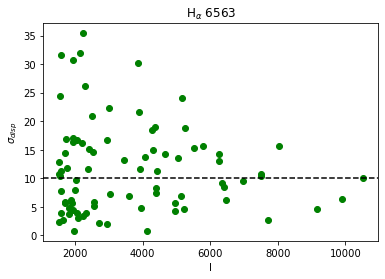

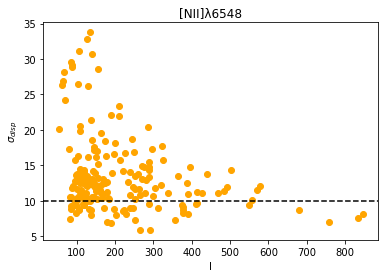

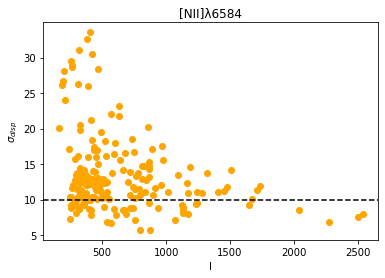

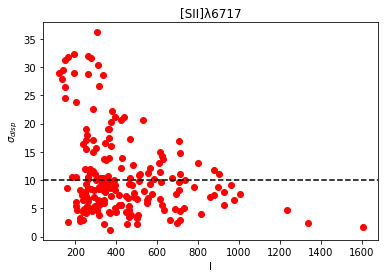

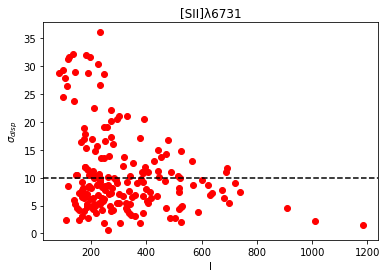

In [47]:
for i in range(n):
    fig, ax = plt.subplots()
    plt.scatter(argo[i][m03].Peak,argo[i][m03].Sig,color=color[i])
    plt.title(LineN[i])
    plt.axhline(y=10, color='k', linestyle='--')
    ax.set_xlabel('I')
    ax.set_ylabel('$σ_{disp}$')
    
    plt.savefig(rg+reg+'\Imgs\SvsI\SI'+LineM[i]+'.png')

Ratios

In [48]:
m01=(Data.X>65)&(Data.X<145)
Data01=Data[m01]

sz=3
wd=Data01.X.max()-Data01.X.min()
hd=Data01.Y.max()-Data01.Y.min()
ar=wd/hd

[NII]/Ha Ratio

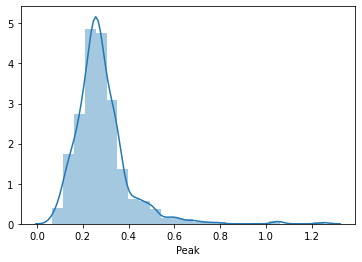

In [49]:
NHRatio=(argo[1].Peak+argo[2].Peak)/argo[0].Peak
sns.distplot(NHRatio,bins=25)

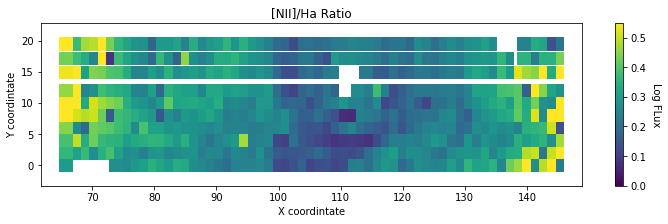

In [50]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=NHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[NII]/Ha Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(0,0.55)

plt.savefig(rg+reg+'\Imgs\RD\RH'+LineM[i]+'.png')

[SII]/Ha Ratio

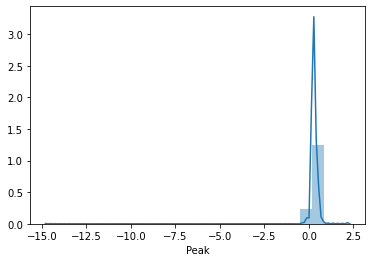

In [51]:
SHRatio=(argo[3].Peak+argo[4].Peak)/argo[0].Peak
sns.distplot(SHRatio,bins=25)

In [52]:
m04=(SHRatio>0)&(SHRatio<0.4)

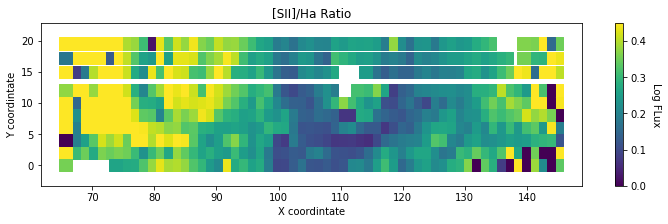

In [53]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
#plt.scatter(argo[0][m04].X,argo[0][m04].Y,c=SHRatio[m04], s=150, marker='s')
plt.scatter(argo[0].X,argo[0].Y,c=SHRatio, s=150, marker='s')
#plt.scatter(DataRI.X,DataRI.Y,c=DataRI['Peak.'+str(i)], s=55)
plt.axis('equal')
plt.title('[SII]/Ha Ratio')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('Log FLux', rotation=270, labelpad=15)
plt.clim(0,0.45)  

plt.savefig(rg+reg+'\Imgs\RD\SH'+LineM[i]+'.png')

Density

In [54]:
def eden(R):
    """Approximate sii electron density from R=6717/6731"""
    RR = 1.0/R
    return 2489*(RR - 0.6971) / (2.3380 - RR)

In [55]:
DenS=eden((argo[4].Peak/argo[4].Peak.max())/(argo[3].Peak/argo[3].Peak.max()))

In [56]:
DenS.describe()

count      586.000000
mean       601.741402
std       1303.088686
min     -10997.809738
25%        506.575405
50%        634.336738
75%        786.085329
max      13852.982982
Name: Peak, dtype: float64

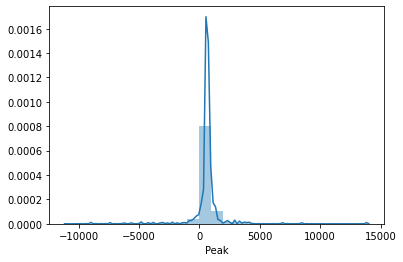

In [57]:
sns.distplot(DenS,bins=25)

In [58]:
m05=(DenS>0)&(DenS<1000)

In [59]:
DenS[m05].describe()

count    474.000000
mean     619.866736
std      174.612429
min       10.512685
25%      524.915054
50%      619.627361
75%      736.211021
max      997.134421
Name: Peak, dtype: float64

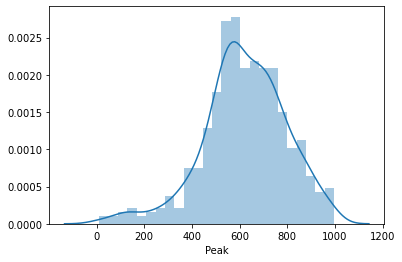

In [60]:
sns.distplot(DenS[m05],bins=25)

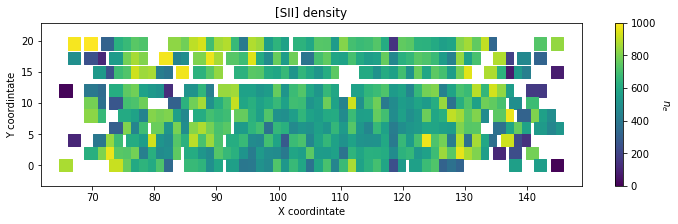

In [61]:

fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.scatter(argo[4][m05].X,argo[4][m05].Y,c=DenS[m05], s=150, marker='s')
plt.axis('equal')
plt.title('[SII] density')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('$n_e$', rotation=270, labelpad=15)
plt.clim(0,1000)  

plt.savefig(rg+reg+'\Imgs\RD\Dens'+LineM[i]+'.png')

Effective Layer thickness

In [62]:
EFL=(argo[0].Peak/argo[0].Peak.max())/DenS**2

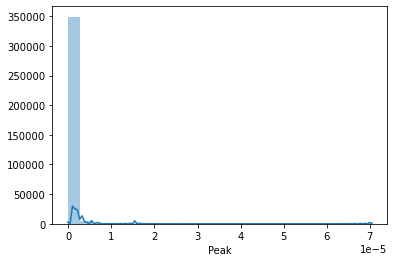

In [63]:
sns.distplot(EFL,bins=25)

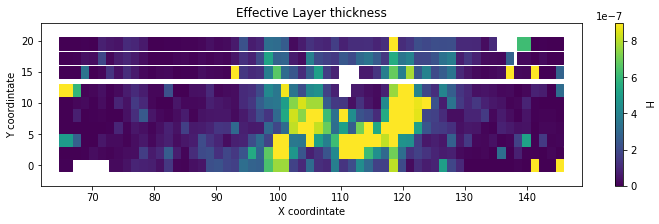

In [64]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))
plt.scatter(argo[0].X,argo[0].Y,c=EFL, s=150, marker='s')
plt.axis('equal')
plt.title('Effective Layer thickness')
ax.set_xlabel('X coordintate')
ax.set_ylabel('Y coordintate')
    
cbar = plt.colorbar()
cbar.set_label('H', rotation=270, labelpad=15)
plt.clim(0,0.0000009)  

plt.savefig(rg+reg+'\Imgs\RD\EFL'+LineM[i]+'.png')

Export Samples for statistical analysis

In [65]:
#argo[0].to_csv(rg+reg+'\Data\ISIS\A\ '+LineM[0]+'.csv')

In [75]:
argo[0].to_csv('Res\ 604I'+LineD[0]+'A.csv')

In [67]:
#for i in range(n):
#    argom01[i].to_csv(rg+reg+'\Data\ISIS\B\ '+LineM[i]+'.csv')

In [76]:
for i in range(n):
    argom01[i].to_csv('Res\ 604I'+LineD[i]+'B.csv')

In [69]:
#for i in range(n):
#    argo[i][m03].to_csv(rg+reg+'\Data\ISIS\C\ '+LineM[i]+'.csv')

In [77]:
for i in range(n):
    argo[i][m03].to_csv('Res\ 604I'+LineD[i]+'C.csv')

In [71]:
#datap='dataI6583.csv'
#dt=pd.read_csv(datap)
#dt=dt.rename(columns={'Unnamed: 0':'No'})
#dt=dt.drop('No',axis=1)
#os.remove(datap)
#dt.describe()

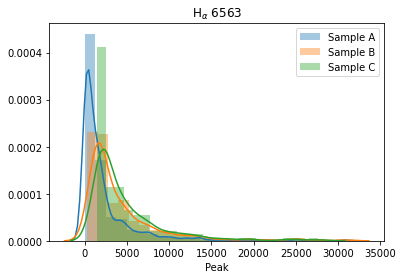

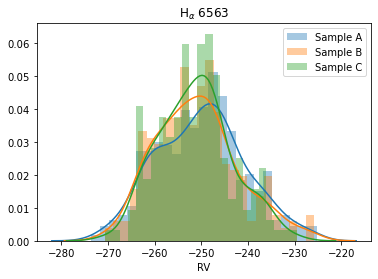

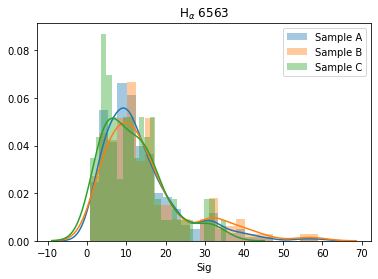

In [72]:
for i in range(1):

    fig, ax = plt.subplots()

    sns.distplot(argo[i].Peak,bins=25,label='Sample A')
    sns.distplot(argom01[i].Peak,bins=25,label='Sample B')
    sns.distplot(argo[i][m03].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')
    

    fig, ax = plt.subplots()
    sns.distplot(argo[i].RV,bins=25,label='Sample A')
    sns.distplot(argom01[i].RV,bins=25,label='Sample B')
    sns.distplot(argo[i][m03].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')


    fig, ax = plt.subplots()
    sns.distplot(argo[i].Sig,bins=25,label='Sample A')
    sns.distplot(argom01[i].Sig,bins=25,label='Sample B')
    sns.distplot(argo[i][m03].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')


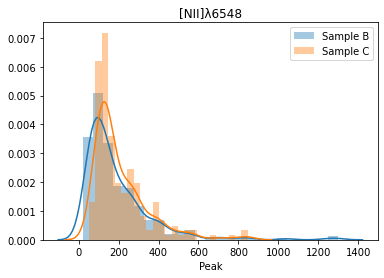

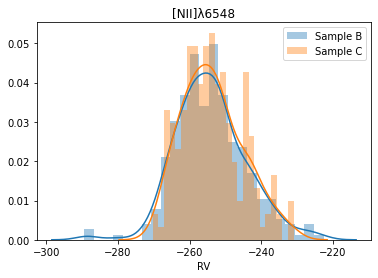

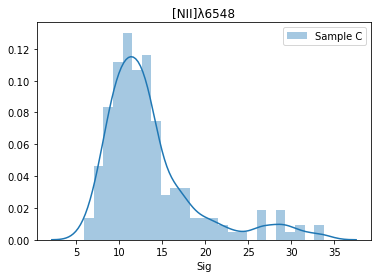

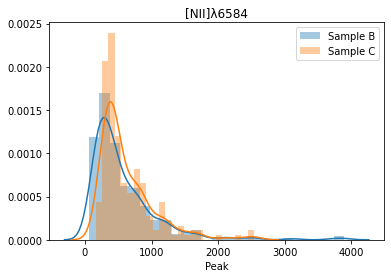

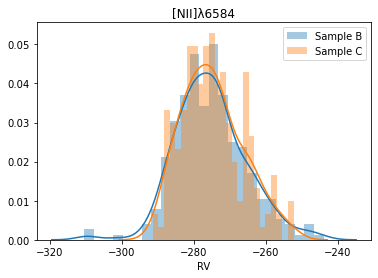

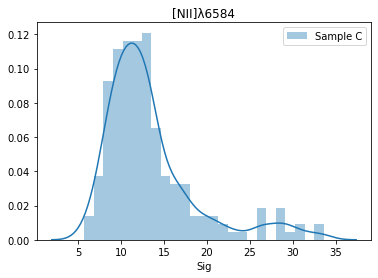

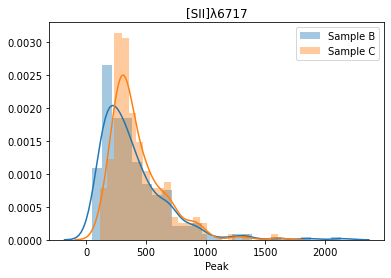

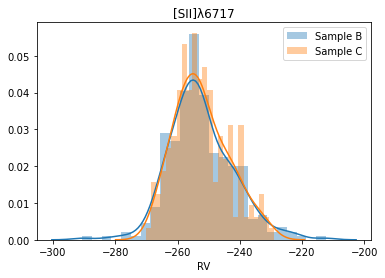

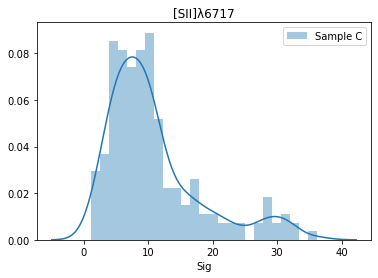

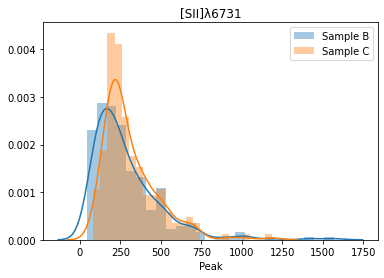

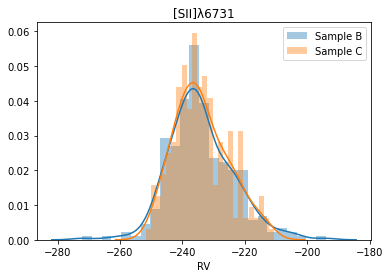

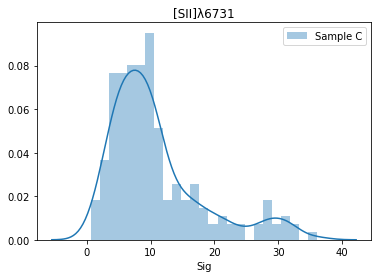

In [73]:
for i in range(1,n,1):

    fig, ax = plt.subplots()

    sns.distplot(argom01[i].Peak,bins=25,label='Sample B')
    sns.distplot(argo[i][m03].Peak,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\F'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    sns.distplot(argom01[i].RV,bins=25,label='Sample B')
    sns.distplot(argo[i][m03].RV,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\RV'+LineM[i]+'.png')

    fig, ax = plt.subplots()
    #sns.distplot(argom01[i].Sig,bins=25,label='Sample B')
    sns.distplot(argo[i][m03].Sig,bins=25,label='Sample C')
    plt.legend()
    plt.title(LineN[i])
    plt.savefig(rg+reg+'\Imgs\Hist\S'+LineM[i]+'.png')

In [74]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 56.43415331840515 seconds ---
